# SIMETRIK - TIM TEST 2020
### JHON JAIRO DIAZ VASQUEZ



### CARGAR LA INFORMACION

## 0. Install libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#LOAD DATA
BANSUR = pd.read_csv('BANSUR.CSV')
CLAP = pd.read_csv('CLAP.CSV')

## 1. Código que permite conocer el monto y la cantidad de las transacciones que SIMETRIK considera como conciliables para la base de CLAP


In [83]:
grouped_data_CLAP = CLAP.groupby('TIPO_TRX')['MONTO'].sum()
print(grouped_data_CLAP)
CLAP.info()

TIPO_TRX
CANCELADA       40528.98
NO APLICA    12645452.53
PAGADA       61050819.41
Name: MONTO, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163549 entries, 0 to 163548
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INICIO6_TARJETA        163543 non-null  float64
 1   FINAL4_TARJETA         163549 non-null  int64  
 2   TIPO_TRX               163549 non-null  object 
 3   MONTO                  163549 non-null  float64
 4   FECHA_TRANSACCION      163549 non-null  object 
 5   CODIGO_AUTORIZACION    150870 non-null  object 
 6   ID_BANCO               163533 non-null  float64
 7   FECHA_RECEPCION_BANCO  163549 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


Como resultado se podria afirmar que existen 163.549 transacciones de la cuales el MONTO corresponde a:
* Transacciones CANCELADA:_____$40.528
* Transacciones NO APLICA:__$12.645.442
* Transaccion de PAGADA:____$61.050.819


si ejecutara esta consulta en SQL podria realizarce en el siguiente codigo:
Ejecutaria el siguiente codigo:

SELECT COUNT(DISTINCT CODIGO_AUTORIZACION) AS cantidad_TRANSACCIONES_unicos, SUM(MONTO) AS suma_monto
FROM CLAP;

## 2. Código que permite conocer el monto y la cantidad de las transacciones que SIMETRIK considera como conciliables para la base de BANSUR


In [84]:
grouped_data_BANSUR = BANSUR.groupby('TIPO_TRX')['MONTO'].sum()
print(grouped_data_BANSUR)
BANSUR.info()

TIPO_TRX
CANCELACION      -76881.91
PAGO           54053911.94
Name: MONTO, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132396 entries, 0 to 132395
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARJETA              132396 non-null  int64  
 1   TIPO_TRX             132396 non-null  object 
 2   MONTO                132396 non-null  float64
 3   FECHA_TRANSACCION    132396 non-null  int64  
 4   CODIGO_AUTORIZACION  132396 non-null  object 
 5   ID_ADQUIRIENTE       132396 non-null  int64  
 6   FECHA_RECEPCION      132396 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 7.1+ MB


Como resultado se podria afirmar que existen 132.396 transacciones de la cuales el MONTO corresponde a:
* Transaccion de Pago: $54.053.911
* Transacciones de cancelaciones -$76.881

si ejecutara esta consulta en SQL podria realizarce en el siguiente codigo:
Ejecutaria el siguiente codigo:

SELECT COUNT(DISTINCT CODIGO_AUTORIZACION) AS cantidad_TRANSACCIONES_unicos, SUM(MONTO) AS suma_monto
FROM BANSUR;

## 3. comparan las cifras de los puntos anteriores respecto de las cifras totales en las fuentes desde un punto de vista del negocio

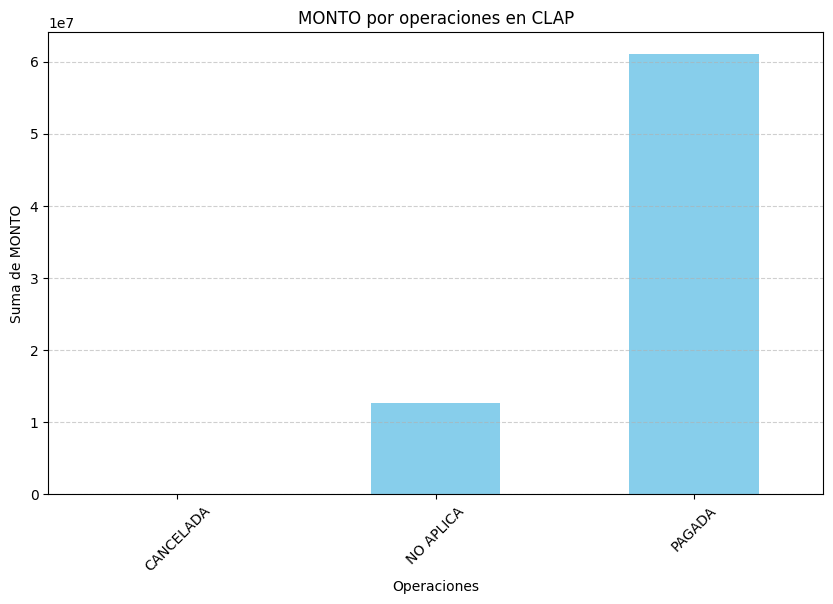

In [34]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
grouped_data_CLAP.plot(kind='bar', color='skyblue')
plt.title('MONTO por operaciones en CLAP')
plt.xlabel('Operaciones')
plt.ylabel('Suma de MONTO')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [40]:
grouped_data_CLAP_TRX = CLAP.groupby('TIPO_TRX')['TIPO_TRX'].count()
print(grouped_data_CLAP_TRX)

TIPO_TRX
CANCELADA        23
NO APLICA     16195
PAGADA       147331
Name: TIPO_TRX, dtype: int64


De acuerdo a las cifras obtenidas con anterioridad y como se muestra en el grafico de barras anterior, se puede determinar qué:

Para el cliente CLAP el cual maneja datafonos y se encarga de procesar pagos se reportaron:

*	Existen 3 tipos de transacciones las cuales son: 
     
     A. 23 CENCELADAS. 
     
     B. 16.195 NO APLICA. 
     
     C. 147.331 PAGADAS.
     
     Total de transacciones: 163.549

* Los montos para cada operación son de 

     A. CANCELADA:_____$40.528

     B. NO APLICA:__$12.645.442
     
     C. PAGADA:____$61.050.819


Si se compara los montos con las transacciones que se registran en las liquidaciones bancarias (BANSUR) registraría las siguientes diferencia: 

* PAGO CLAP $61.050.819,41 - PAGO BANSUR $54.053.911,94 

  TOTAL Diferencia: $6.996.907,47

* TRANSACCIONES CLAP 132.396 - TRANSACCIONE BANSUR 163.549
  
  TOTAL diferencia: 31.153 transacciones entre bases.



# 4. codigo que contiene la información de CLAP y BANSUR; agregue una columna en la que se evidencie si la transacción cruzó y una columna en la que se inserte un ID autoincremental para el control de la conciliación



In [80]:
# Leer las bases de datos BANSUR y CLAP
bansur_data = pd.read_csv('BANSUR.csv')
clap_data = pd.read_csv('CLAP.csv')

# Realizar el cruce por el campo CODIGO_AUTORIZACION
merged_data = pd.merge(bansur_data, clap_data, on='CODIGO_AUTORIZACION', how='left', indicator=True)

# Agregar una columna que indique si la información cruzó o no
merged_data['Cruce'] = merged_data['_merge'].apply(lambda x: 'Cruzo' if x == 'both' else 'No cruzo')

# Agregar una columna con un ID autoincremental
merged_data['ID'] = range(1, len(merged_data) + 1)

# Mostrar el resultado
print(merged_data)

           TARJETA TIPO_TRX_x  MONTO_x  FECHA_TRANSACCION_x  \
0       9540150300       PAGO     44.0             20201101   
1       9540150300       PAGO     93.0             20201101   
2       9540150310       PAGO   1579.0             20201101   
3       9540150310       PAGO   1579.0             20201101   
4       9540150319       PAGO     86.0             20201101   
...            ...        ...      ...                  ...   
371847  4427537641       PAGO   5000.0             20201101   
371848  4427537641       PAGO   5000.0             20201101   
371849  4427537641       PAGO   5000.0             20201101   
371850  4461382609       PAGO  17500.0             20201101   
371851  4461382609       PAGO  50000.0             20201101   

       CODIGO_AUTORIZACION  ID_ADQUIRIENTE FECHA_RECEPCION  INICIO6_TARJETA  \
0                   272012    320720237226      2020-11-03              NaN   
1                   216149    812801092295      2020-11-03              NaN   
2     

In [65]:

# Leer las bases de datos CLAP y BANSUR
clap_data = pd.read_csv('CLAP.csv')
bansur_data = pd.read_csv('BANSUR.csv')

# Realizar el cruce por el campo CODIGO_AUTORIZACION
merged_data = pd.merge(clap_data, bansur_data, on='CODIGO_AUTORIZACION', how='outer', indicator=True)

# Agregar una columna que indique si la información cruzó o no
merged_data['Cruce'] = merged_data['_merge'].apply(lambda x: 'Cruzó' if x == 'both' else 'No cruzó')

# Crear una nueva base de datos con la información combinada
merged_data.to_csv('Nueva_Base_Datos.csv', index=False)

print("La nueva base de datos con la información combinada ha sido creada.")

La nueva base de datos con la información combinada ha sido creada.


## 5. Calcule el porcentaje de transacciones de la base conciliable de CLAP cruzó contra la liquidación de BANSUR.

In [60]:
# Leer las bases de datos CLAP y BANSUR
clap_data = pd.read_csv('CLAP.csv')
bansur_data = pd.read_csv('BANSUR.csv')

# Realizar el cruce por el campo CODIGO_AUTORIZACION
merged_data = pd.merge(clap_data, bansur_data, on='CODIGO_AUTORIZACION', how='left',indicator=True)


# Contar el número de registros que no cruzaron
no_cruzados = merged_data[merged_data['_merge'] != 'both']

# Calcular el número de transacciones cruzadas
transacciones_cruzadas = (len(clap_data) - len(no_cruzados))

# Calcular el porcentaje de transacciones cruzadas
porcentaje_transacciones_cruzadas = (transacciones_cruzadas / len(clap_data)) * 100


print(f"El porcentaje de transacciones de CLAP que cruzaron contra BANSUR es: {porcentaje_transacciones_cruzadas:.2f}%")

El porcentaje de transacciones de CLAP que cruzaron contra BANSUR es: 68.65%


## 6. Calcule el porcentaje de transacciones de la base conciliable de BANSUR no cruzó contra la liquidación de CLAP.

In [49]:
# Leer las bases de datos BANSUR y CLAP
bansur_data = pd.read_csv('BANSUR.csv')
clap_data = pd.read_csv('CLAP.csv')

# Realizar el cruce por el campo CODIGO_AUTORIZACION
merged_data = pd.merge(bansur_data, clap_data, on='CODIGO_AUTORIZACION', how='left', indicator=True)

# Contar el número de registros que no cruzaron
no_cruzados = merged_data[merged_data['_merge'] != 'both']

# Calcular el porcentaje de información que no cruzó
porcentaje_no_cruzado = (len(no_cruzados) / len(bansur_data)) * 100

print(f"El porcentaje de información que no cruzó entre BANSUR y CLAP es: {porcentaje_no_cruzado:.2f}%")

El porcentaje de información que no cruzó entre BANSUR y CLAP es: 19.16%
